In [1]:
%matplotlib inline

In [1]:
import skimage

## Images are numpy arrays  
Images are represented in scikit-image using standard numpy arrays. This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as matplotlib and scipy.  
Let's see how to build a grayscale image as a 2D array:

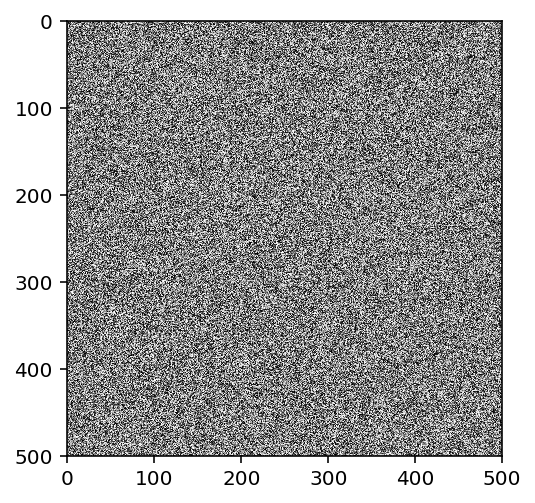

In [2]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([500, 500])

plt.imshow(random_image, cmap='gray', interpolation='nearest');

The same holds for "real-world" images:

<class 'numpy.ndarray'> uint8 (303, 384)


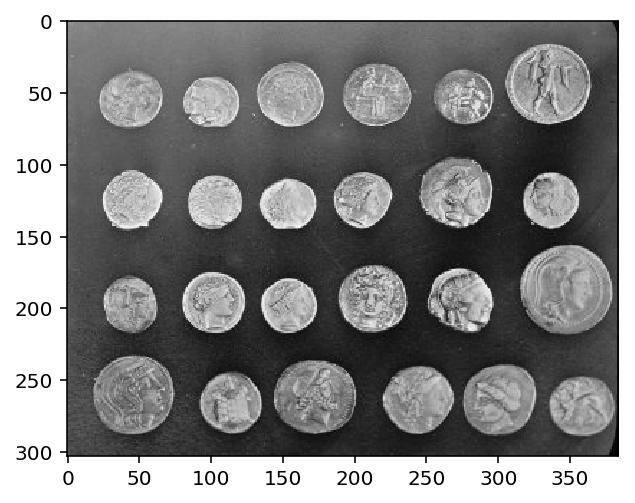

In [3]:
from skimage import data

coins = data.coins()

print(type(coins), coins.dtype, coins.shape)
plt.imshow(coins, cmap='gray', interpolation='nearest');

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

Shape: (300, 451, 3)
Values min/max: 0 231


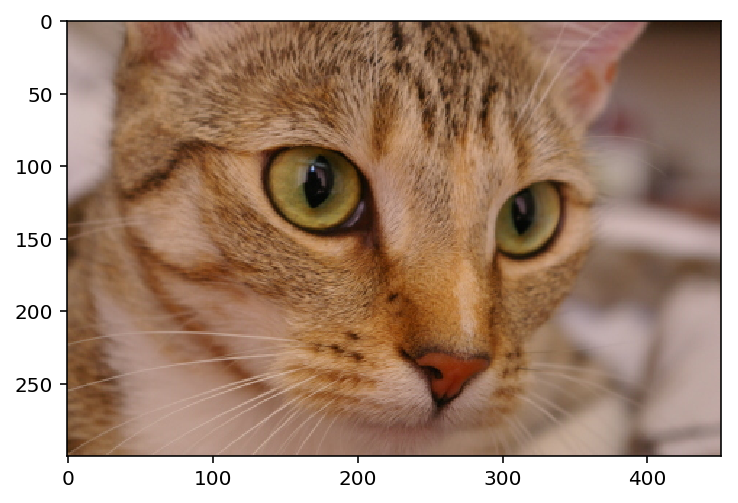

In [4]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat, interpolation='nearest');

These are just numpy arrays. Making a red square is easy using just array slicing and manipulation:

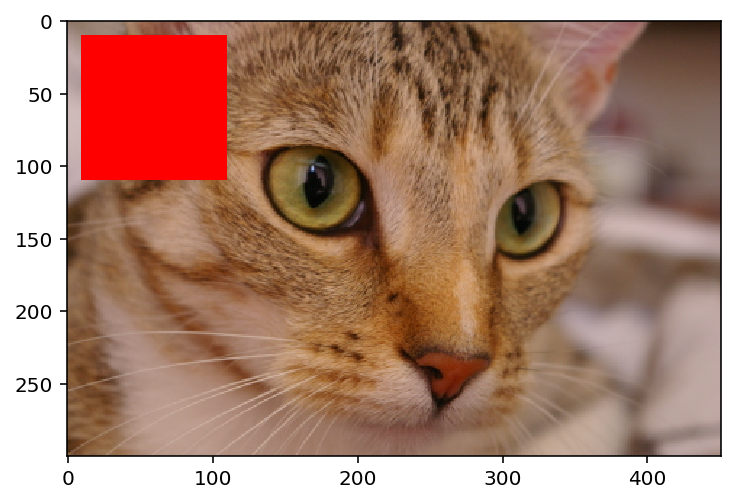

In [5]:
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);

Images can also include transparent regions by adding a 4th dimension, called an alpha layer.

### Other shapes, and their meanings

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale|(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|




## Displaying images using matplotlib

In [6]:
from skimage import data

img0 = data.chelsea()
img1 = data.rocket()

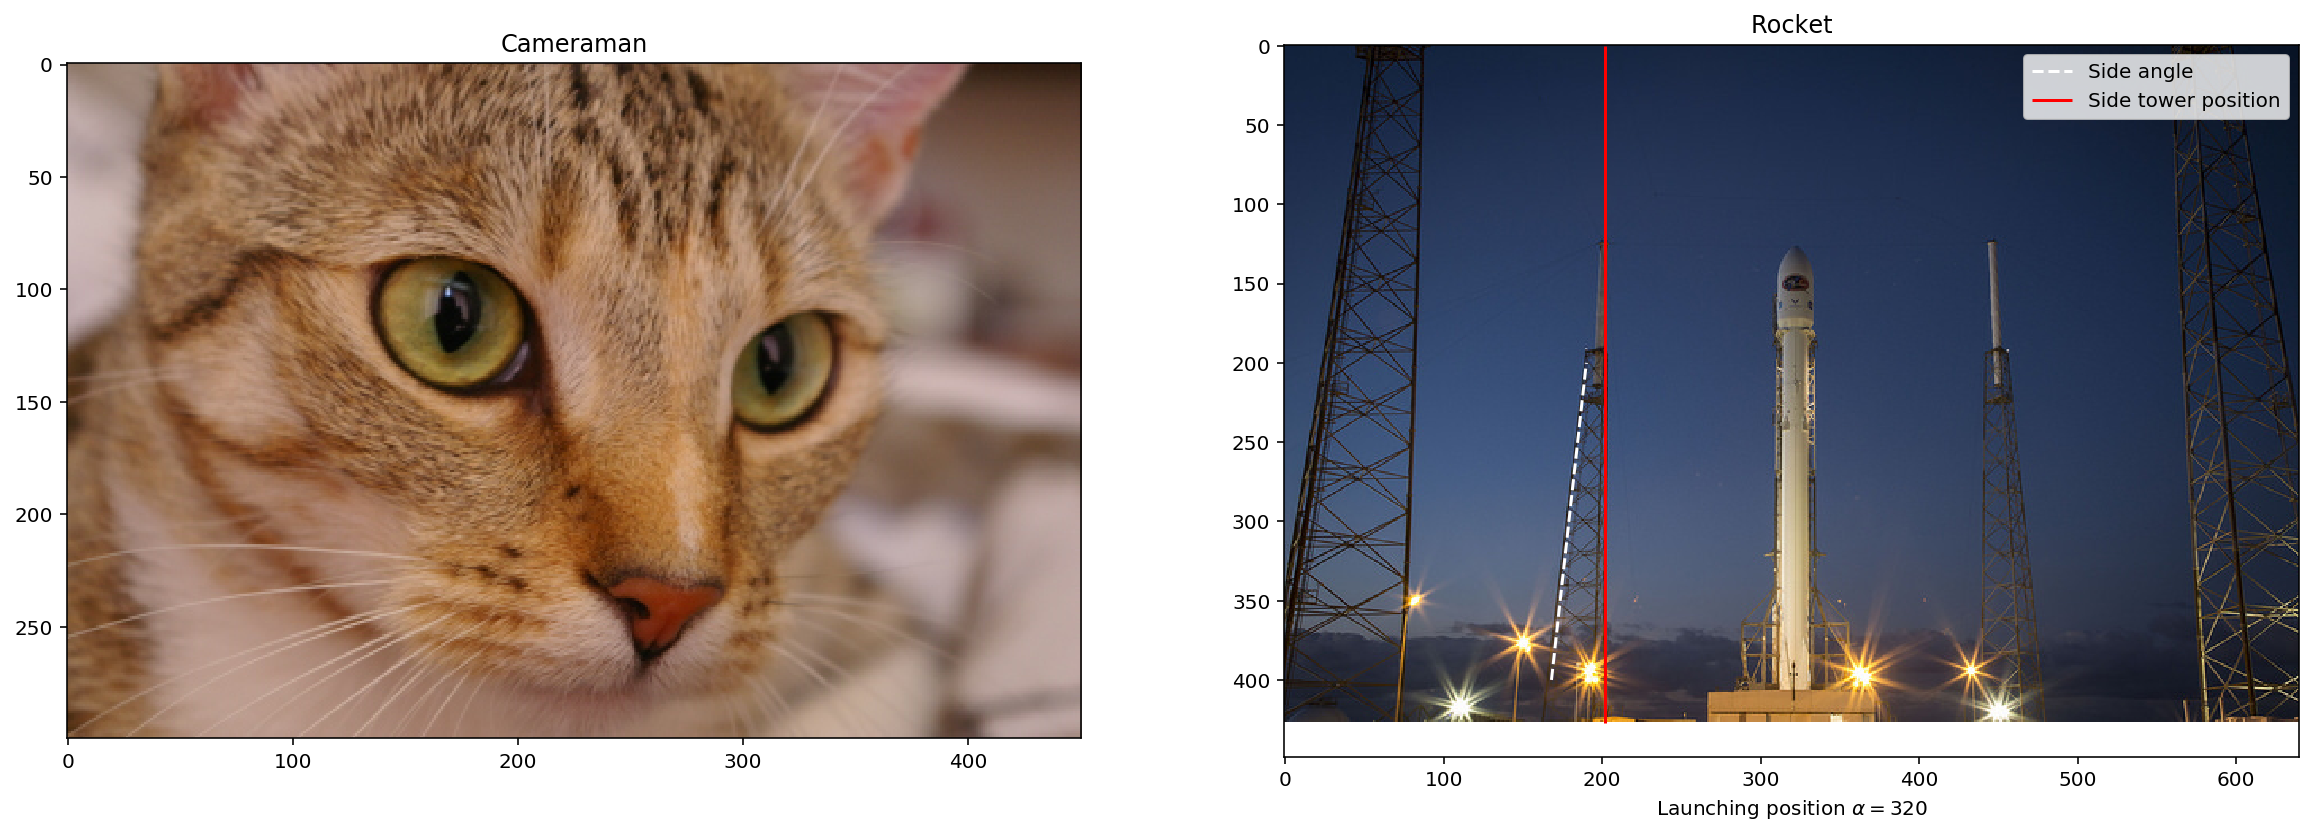

In [7]:
import matplotlib.pyplot as plt

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img0)
ax0.set_title('Cameraman')

ax1.imshow(img1)
ax1.set_title('Rocket')
ax1.set_xlabel(r'Launching position $\alpha=320$')

ax1.vlines([202], 0, img1.shape[0], color='red', label='Side tower position')
ax1.plot([168, 190], [400, 200], color='white', linestyle='--', label='Side angle')

ax1.legend();

## Image I/O
Mostly, we won't be using input images from the scikit-image example data sets. Those images are typically stored in JPEG or PNG format. Since scikit-image operates on NumPy arrays, any image reader library that provides arrays will do. Options include matplotlib, pillow, imageio, imread, etc.
scikit-image conveniently wraps many of these in the io submodule, and will use whatever option is available:

In [10]:
from skimage import io

In [17]:
io.

<module 'skimage.io.collection' from '/ext/anaconda3/lib/python3.5/site-packages/skimage/io/collection.py'>

In [20]:
image = io.imread('../images/balloon.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '../images/balloon.jpg'

In [9]:
from skimage import io

image = io.imread('../images/balloon.jpg')

print(type(image))
print(image.dtype)
print(image.min(), image.max())
plt.imshow(image);

FileNotFoundError: [Errno 2] No such file or directory: '../images/balloon.jpg'

In [21]:
ic = io.ImageCollection('../images/*.png:../images/*.jpg')

print('Type:', type(ic))

ic.files

Type: <class 'skimage.io.collection.ImageCollection'>


[]

In [22]:
f, axes = plt.subplots(nrows=2, ncols=len(ic) // 2, figsize=(20, 3))

for i, image in enumerate(ic):
    axes.flat[i].imshow(image, cmap='gray')
    axes.flat[i].axis('off')
    
plt.tight_layout()